<a href="https://colab.research.google.com/github/zenaiev/hep/blob/main/unfold/unfold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install ROOT and RooUnfold

In [1]:
!wget https://root.cern/download/root_v6.32.04.Linux-ubuntu22.04-x86_64-gcc11.4.tar.gz
!tar -xzf root_v6.32.04.Linux-ubuntu22.04-x86_64-gcc11.4.tar.gz
import os
pwd = os.getcwd()
os.environ['ROOTSYS'] = pwd + '/root'
os.environ['PATH'] += ':' + pwd + '/root/bin'
os.environ['LD_LIBRARY_PATH'] += ':' + pwd + '/root/lib'
import sys
sys.path.append(pwd + '/root/lib')
#import ROOT
#print(ROOT.__version__)

--2024-10-03 02:44:14--  https://root.cern/download/root_v6.32.04.Linux-ubuntu22.04-x86_64-gcc11.4.tar.gz
Resolving root.cern (root.cern)... 188.184.49.144, 2001:1458:d00:55::100:c
Connecting to root.cern (root.cern)|188.184.49.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 300006880 (286M) [application/x-gzip]
Saving to: ‘root_v6.32.04.Linux-ubuntu22.04-x86_64-gcc11.4.tar.gz’

root_v6.32.04.Linux 100%[===================>] 286.11M  30.2MB/s    in 11s     

2024-10-03 02:44:26 (26.2 MB/s) - ‘root_v6.32.04.Linux-ubuntu22.04-x86_64-gcc11.4.tar.gz’ saved [300006880/300006880]



In [2]:
!git clone https://gitlab.cern.ch/RooUnfold/RooUnfold.git


Cloning into 'RooUnfold'...
remote: Enumerating objects: 5528, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 5528 (delta 135), reused 161 (delta 101), pack-reused 5312 (from 1)
Receiving objects: 100% (5528/5528), 3.39 MiB | 4.18 MiB/s, done.
Resolving deltas: 100% (4298/4298), done.



Do unfolding

In [3]:
os.chdir(pwd + '/RooUnfold')
!mkdir build
os.chdir(pwd + '/RooUnfold/build')
!cmake ..
!make -j17
#os.chdir(pwd)
#import RooUnfold


CMake Deprecation Warning at CMakeLists.txt:9 (cmake_minimum_required):
  Compatibility with CMake < 3.5 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value or use a ...<max> suffix to tell
  CMake that the project does not need compatibility with older versions.


-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found Vdt: /content/root/include (found version "0.4")
Setup using plain ROOT
-- Could NOT find Doxygen (missing: DOXYGEN_EXECUTABLE) 
Doxygen need to be installed to generate the doxyg

100%|██████████| 100000/100000 [00:00<00:00, 426861.20it/s]


TypeError: none of the 6 overloaded methods succeeded. Full details:
  RooUnfoldTUnfoldT<TH1,TH2>::RooUnfoldTUnfoldT<TH1,TH2>(const RooUnfoldTUnfoldT<TH1,TH2>& rhs) =>
    TypeError: takes at most 1 arguments (2 given)
  RooUnfoldTUnfoldT<TH1,TH2>::RooUnfoldTUnfoldT<TH1,TH2>() =>
    TypeError: takes at most 0 arguments (2 given)
  RooUnfoldTUnfoldT<TH1,TH2>::RooUnfoldTUnfoldT<TH1,TH2>(const char* name, const char* title) =>
    TypeError: could not convert argument 1 (bad argument type for built-in operation)
  RooUnfoldTUnfoldT<TH1,TH2>::RooUnfoldTUnfoldT<TH1,TH2>(const TString& name, const TString& title) =>
    TypeError: could not convert argument 1
  RooUnfoldTUnfoldT<TH1,TH2> constructor failed
  RooUnfoldTUnfoldT<TH1,TH2>::RooUnfoldTUnfoldT<TH1,TH2>(const RooUnfoldResponseT<TH1,TH2>* res, const TH1* meas, Double_t tau, TUnfold::ERegMode reg = TUnfold::kRegModeDerivative, Bool_t handleFakes = false, const char* name = 0, const char* title = 0) =>
    TypeError: takes at least 3 arguments (2 given)

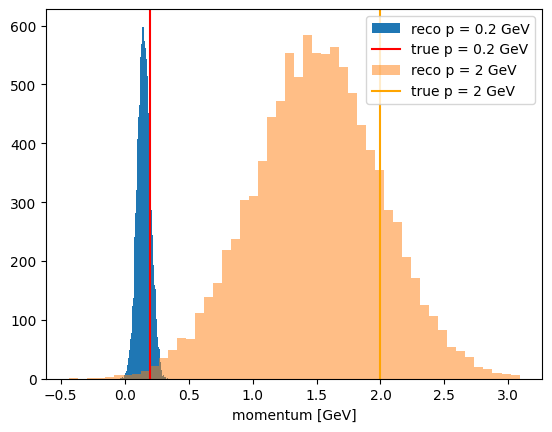

In [4]:
import ROOT
#import RooUnfold
import tqdm
import random
from matplotlib import pyplot as plt
#ROOT.gSystem.Load('libRooUnfold.so')
import sys
#sys.path.append('/home/zenaiev/soft/RooUnfold/build/RooUnfold')

def smear(momentum):
  mean = 0.75
  sigma = 0.25
  fluct = random.normalvariate(mean, sigma)
  return momentum * fluct

def generate(nevents, lambda_exp, response=None, h_true=None, h_reco=None):
  for i in tqdm.tqdm(range(nevents)):
    momentum_true = random.expovariate(lambda_exp)
    momentum_measured = smear(momentum_true)
    #print(momentum_true, momentum_measured)
    if response is not None:
      response.Fill(momentum_measured, momentum_true)
    if h_reco is not None:
      h_reco.Fill(momentum_measured)
    if h_true is not None:
      h_true.Fill(momentum_true)

if __name__ == '__main__':
  # random seed for reproducible results
  random.seed(42)

  # draw smearing distribution
  fig, ax = plt.subplots()
  ax.hist([smear(0.2) for i in range(10000)], bins=50, label='reco p = 0.2 GeV')
  ax.axvline(x=0.2, color='red', label='true p = 0.2 GeV')
  ax.hist([smear(2.0) for i in range(10000)], bins=50, label='reco p = 2 GeV', alpha=0.5)
  ax.axvline(x=2.0, color='orange', label='true p = 2 GeV')
  ax.legend()
  ax.set_xlabel('momentum [GeV]')
  #plt.show() # display immediately
  fig.savefig('smeared.pdf')
  fig.savefig('smeared.png')

  # generate events
  lambda_exp = 2.0
  response = ROOT.RooUnfoldResponse(120, 0., 3., 30, 0., 3.)
  generate(100000, lambda_exp, response=response)
  h_data = ROOT.TH1F('h_data', 'Data', 120, 0., 3.)
  h_true = ROOT.TH1F('h_true', 'True', 30, 0., 3.)
  generate(100000, lambda_exp, h_reco=h_data, h_true=h_true)

  # unregularised unfolding (TUnfold)
  unfold_noreg = ROOT.RooUnfoldTUnfold (response, h_data) # third parameter is regularisation strength tau (arbitrary value here, will be reset later)
  unfold_noreg.FixTau(0.)
  h_unfold_noreg = unfold_noreg.Hunfold()

  # regularised unfolding (TUnfold)
  unfold_reg = ROOT.RooUnfoldTUnfold (response, h_data)
  #unfold_noreg.FixTau(0.01)
  unfold_reg.OptimiseTau() # by default it will do L curve scan
  h_unfold_reg = unfold_reg.Hunfold()

  # plot response matrix
  c_2d = ROOT.TCanvas("canvas_2d", "Response", 600, 600)
  c_2d.SetMargin(0.1, 0.2, 0.1, 0.1)
  h_response = response.Hresponse()
  h_response.SetStats(0) # suppress statistics box
  h_response.GetXaxis().SetTitle('momentum [GeV] (reco)')
  h_response.GetYaxis().SetTitle('momentum [GeV] (true)')
  h_response.Draw('colz')
  c_2d.SaveAs('response.pdf')
  c_2d.SaveAs('response.png')

  # plot true, reconstructed and unfolded distributions
  c_1d = ROOT.TCanvas("canvas_1d", "Unfolding", 300, 600)
  c_1d.Divide(1,3)
  h_data.GetXaxis().SetTitle('momentum [GeV]')
  h_data.GetYaxis().SetTitle('Events')
  h_data.SetStats(0)
  h_true.SetLineColor(ROOT.kBlack)
  h_data.SetLineColor(ROOT.kBlue)
  h_unfold_noreg.SetMarkerColor(ROOT.kRed)
  h_unfold_noreg.SetLineColor(ROOT.kRed)
  h_unfold_reg.SetMarkerColor(ROOT.kMagenta)
  h_unfold_reg.SetLineColor(ROOT.kMagenta)
  h_data.Scale(h_true.Integral('width')/h_data.Integral('width')) # rescale data for plot, because the number of bins is different
  #h_data.SetMinimum(-1*h_data.GetMaximum())
  def draw_all():
    h_data.Draw('hist')
    h_true.Draw('hist same')
    h_unfold_noreg.Draw('e0 same')
    h_unfold_reg.Draw('e0 same')
  c_1d.cd(1)
  draw_all()
  legend = ROOT.TLegend(0.5, 0.6, 0.9, 0.9)
  legend.AddEntry(h_true, 'True', 'l')
  legend.AddEntry(h_data, 'Reco', 'l')
  legend.AddEntry(h_unfold_noreg, 'Reco unfolded (unregulaarised)', 'l')
  legend.AddEntry(h_unfold_reg, 'Reco unfolded (regulaarised)', 'l')
  legend.Draw()
  c_1d.cd(2)
  draw_all()
  ROOT.gPad.SetLogy()
  c_1d.cd(3)
  h_unfold_noreg_ratio = h_unfold_noreg.Clone()
  h_unfold_noreg_ratio.Divide(h_true)
  h_unfold_reg_ratio = h_unfold_reg.Clone()
  h_unfold_reg_ratio.Divide(h_true)
  #h_unfold_noreg_ratio.GetYaxis().SetRangeUser(0.5,1.5)
  h_unfold_noreg_ratio.GetXaxis().SetTitle('momentum [GeV]')
  h_unfold_noreg_ratio.GetYaxis().SetTitle('Events')
  h_unfold_noreg_ratio.SetStats(0)
  h_unfold_noreg_ratio.Draw('e0')
  h_unfold_reg_ratio.Draw('e0 same')
  c_1d.SaveAs('unfolding.pdf')
  c_1d.SaveAs('unfolding.png')


In [4]:
#print(pwd)
#os.environ['PATH'] += ':' + pwd + '/RooUnfold/build'
os.environ['LD_LIBRARY_PATH'] += ':' + pwd + '/RooUnfold/build'
os.environ['PYTHONPATH'] = pwd + '/RooUnfold/build'
sys.path.append(pwd + '/RooUnfold/build')
sys.path.append(pwd + '/RooUnfold/build/RooUnfold')
#os.chdir(pwd + '/RooUnfold/build')
#import RooUnfold
#import ROOT
#print(RooUnfold.__version__)
#r = ROOT.RooUnfoldResponse

In [12]:
!ls -la RooUnfold/__init__.py

lrwxrwxrwx 1 root root 37 Oct  3 02:25 RooUnfold/__init__.py -> /content/RooUnfold/python/__init__.py


100%|██████████| 100000/100000 [00:00<00:00, 394535.23it/s]


TypeError: none of the 6 overloaded methods succeeded. Full details:
  RooUnfoldTUnfoldT<TH1,TH2>::RooUnfoldTUnfoldT<TH1,TH2>(const RooUnfoldTUnfoldT<TH1,TH2>& rhs) =>
    TypeError: takes at most 1 arguments (2 given)
  RooUnfoldTUnfoldT<TH1,TH2>::RooUnfoldTUnfoldT<TH1,TH2>() =>
    TypeError: takes at most 0 arguments (2 given)
  RooUnfoldTUnfoldT<TH1,TH2>::RooUnfoldTUnfoldT<TH1,TH2>(const char* name, const char* title) =>
    TypeError: could not convert argument 1 (bad argument type for built-in operation)
  RooUnfoldTUnfoldT<TH1,TH2>::RooUnfoldTUnfoldT<TH1,TH2>(const TString& name, const TString& title) =>
    TypeError: could not convert argument 1
  RooUnfoldTUnfoldT<TH1,TH2> constructor failed
  RooUnfoldTUnfoldT<TH1,TH2>::RooUnfoldTUnfoldT<TH1,TH2>(const RooUnfoldResponseT<TH1,TH2>* res, const TH1* meas, Double_t tau, TUnfold::ERegMode reg = TUnfold::kRegModeDerivative, Bool_t handleFakes = false, const char* name = 0, const char* title = 0) =>
    TypeError: takes at least 3 arguments (2 given)

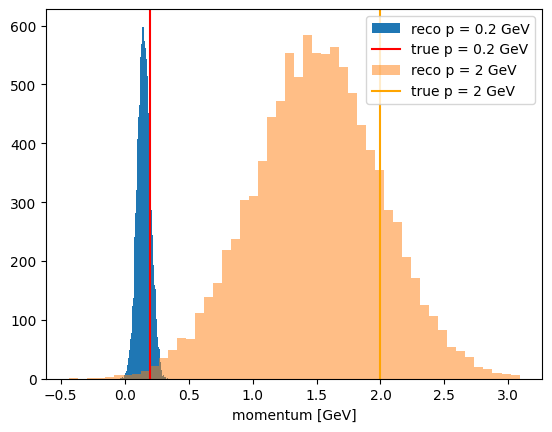

Warning in <TROOT::Append>: Replacing existing TH1: h_data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_true (Potential memory leak).
IncrementalExecutor::executeFunction: symbol '_ZN17RooUnfoldTUnfoldTI3TH13TH2EC1EPK18RooUnfoldResponseTIS0_S1_EPKS0_N7TUnfold8ERegModeEbPKcSC_' unresolved while linking symbol '__cf_28'!
You are probably missing the definition of RooUnfoldTUnfoldT<TH1, TH2>::RooUnfoldTUnfoldT(RooUnfoldResponseT<TH1, TH2> const*, TH1 const*, TUnfold::ERegMode, bool, char const*, char const*)
Maybe you need to load the corresponding shared library?


In [13]:
import ROOT
#import RooUnfold
import tqdm
import random
from matplotlib import pyplot as plt
#ROOT.gSystem.Load('libRooUnfold.so')
import sys
#sys.path.append('/home/zenaiev/soft/RooUnfold/build/RooUnfold')

def smear(momentum):
  mean = 0.75
  sigma = 0.25
  fluct = random.normalvariate(mean, sigma)
  return momentum * fluct

def generate(nevents, lambda_exp, response=None, h_true=None, h_reco=None):
  for i in tqdm.tqdm(range(nevents)):
    momentum_true = random.expovariate(lambda_exp)
    momentum_measured = smear(momentum_true)
    #print(momentum_true, momentum_measured)
    if response is not None:
      response.Fill(momentum_measured, momentum_true)
    if h_reco is not None:
      h_reco.Fill(momentum_measured)
    if h_true is not None:
      h_true.Fill(momentum_true)

if __name__ == '__main__':
  # random seed for reproducible results
  random.seed(42)

  # draw smearing distribution
  fig, ax = plt.subplots()
  ax.hist([smear(0.2) for i in range(10000)], bins=50, label='reco p = 0.2 GeV')
  ax.axvline(x=0.2, color='red', label='true p = 0.2 GeV')
  ax.hist([smear(2.0) for i in range(10000)], bins=50, label='reco p = 2 GeV', alpha=0.5)
  ax.axvline(x=2.0, color='orange', label='true p = 2 GeV')
  ax.legend()
  ax.set_xlabel('momentum [GeV]')
  #plt.show() # display immediately
  fig.savefig('smeared.pdf')
  fig.savefig('smeared.png')

  # generate events
  lambda_exp = 2.0
  response = ROOT.RooUnfoldResponse(120, 0., 3., 30, 0., 3.)
  generate(100000, lambda_exp, response=response)
  h_data = ROOT.TH1F('h_data', 'Data', 120, 0., 3.)
  h_true = ROOT.TH1F('h_true', 'True', 30, 0., 3.)
  generate(100000, lambda_exp, h_reco=h_data, h_true=h_true)

  # unregularised unfolding (TUnfold)
  unfold_noreg = ROOT.RooUnfoldTUnfold (response, h_data) # third parameter is regularisation strength tau (arbitrary value here, will be reset later)
  unfold_noreg.FixTau(0.)
  h_unfold_noreg = unfold_noreg.Hunfold()

  # regularised unfolding (TUnfold)
  unfold_reg = ROOT.RooUnfoldTUnfold (response, h_data)
  #unfold_noreg.FixTau(0.01)
  unfold_reg.OptimiseTau() # by default it will do L curve scan
  h_unfold_reg = unfold_reg.Hunfold()

  # plot response matrix
  c_2d = ROOT.TCanvas("canvas_2d", "Response", 600, 600)
  c_2d.SetMargin(0.1, 0.2, 0.1, 0.1)
  h_response = response.Hresponse()
  h_response.SetStats(0) # suppress statistics box
  h_response.GetXaxis().SetTitle('momentum [GeV] (reco)')
  h_response.GetYaxis().SetTitle('momentum [GeV] (true)')
  h_response.Draw('colz')
  c_2d.SaveAs('response.pdf')
  c_2d.SaveAs('response.png')

  # plot true, reconstructed and unfolded distributions
  c_1d = ROOT.TCanvas("canvas_1d", "Unfolding", 300, 600)
  c_1d.Divide(1,3)
  h_data.GetXaxis().SetTitle('momentum [GeV]')
  h_data.GetYaxis().SetTitle('Events')
  h_data.SetStats(0)
  h_true.SetLineColor(ROOT.kBlack)
  h_data.SetLineColor(ROOT.kBlue)
  h_unfold_noreg.SetMarkerColor(ROOT.kRed)
  h_unfold_noreg.SetLineColor(ROOT.kRed)
  h_unfold_reg.SetMarkerColor(ROOT.kMagenta)
  h_unfold_reg.SetLineColor(ROOT.kMagenta)
  h_data.Scale(h_true.Integral('width')/h_data.Integral('width')) # rescale data for plot, because the number of bins is different
  #h_data.SetMinimum(-1*h_data.GetMaximum())
  def draw_all():
    h_data.Draw('hist')
    h_true.Draw('hist same')
    h_unfold_noreg.Draw('e0 same')
    h_unfold_reg.Draw('e0 same')
  c_1d.cd(1)
  draw_all()
  legend = ROOT.TLegend(0.5, 0.6, 0.9, 0.9)
  legend.AddEntry(h_true, 'True', 'l')
  legend.AddEntry(h_data, 'Reco', 'l')
  legend.AddEntry(h_unfold_noreg, 'Reco unfolded (unregulaarised)', 'l')
  legend.AddEntry(h_unfold_reg, 'Reco unfolded (regulaarised)', 'l')
  legend.Draw()
  c_1d.cd(2)
  draw_all()
  ROOT.gPad.SetLogy()
  c_1d.cd(3)
  h_unfold_noreg_ratio = h_unfold_noreg.Clone()
  h_unfold_noreg_ratio.Divide(h_true)
  h_unfold_reg_ratio = h_unfold_reg.Clone()
  h_unfold_reg_ratio.Divide(h_true)
  #h_unfold_noreg_ratio.GetYaxis().SetRangeUser(0.5,1.5)
  h_unfold_noreg_ratio.GetXaxis().SetTitle('momentum [GeV]')
  h_unfold_noreg_ratio.GetYaxis().SetTitle('Events')
  h_unfold_noreg_ratio.SetStats(0)
  h_unfold_noreg_ratio.Draw('e0')
  h_unfold_reg_ratio.Draw('e0 same')
  c_1d.SaveAs('unfolding.pdf')
  c_1d.SaveAs('unfolding.png')
